pip install --force-reinstall tensorflow

# SOMMAIRE

### Introduction

L'objectif de ce projet est d'entrainer un CNN capable de classer les images en fonction de la race du chien présent sur l'image, en utilisant notamment du Transfert Learning.  
Le dataset utilisé est le [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) .


1. [Imports et chemins](#-1.-Imports-et-chemins)
2. [Observation des données](#-2.-Observation-des-données)
3. [Preprocessing](#-3.-Preprocessing)
4. [Modèles CNN](#-4.-Modèles-CNN)
5. [Transfer Learning](#-5.-Transfer-Learning)

## 1. Imports et chemins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

# Observation
from wordcloud import WordCloud

# Preprocessing
import cv2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
PATH_INPUT = "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/input"
PATH_OUTPUT = "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/output"
PATH_FIGURES = "/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/output/figures"

In [3]:
# Unix : Il ne faut pas prendre en compte les fichiers cachés
list_breeds = [f for f in os.listdir(PATH_INPUT + "/Images") if not f.startswith('.')]

## 2. Observation des données

In [4]:
print(f"Nb de catégories/d'espèces de chiens :", len(list_breeds))

Nb de catégories/d'espèces de chiens : 120


In [5]:
# Production d'un df
 
df = pd.DataFrame(list_breeds, columns=['Id_name_breed'])
df['breed_name']=df['Id_name_breed'].apply(lambda x: x.split('-')[1])
df['Id']=df['Id_name_breed'].apply(lambda x: x.split('-')[0])

nb_pic=[]
for name in df.Id_name_breed:
   nb_pic.append(len(os.listdir(f"{PATH_INPUT}//Images" + "/" + name)))

df['nb_pic']=nb_pic

print("Nb total d'images:", df["nb_pic"].sum())

Nb total d'images: 20580


In [6]:
df.head(3)

Id_name_breed                breed_name         Id  \
0             n02097658-silky_terrier             silky_terrier  n02097658   
1        n02092002-Scottish_deerhound        Scottish_deerhound  n02092002   
2  n02099849-Chesapeake_Bay_retriever  Chesapeake_Bay_retriever  n02099849   

   nb_pic  
0     183  
1     232  
2     167

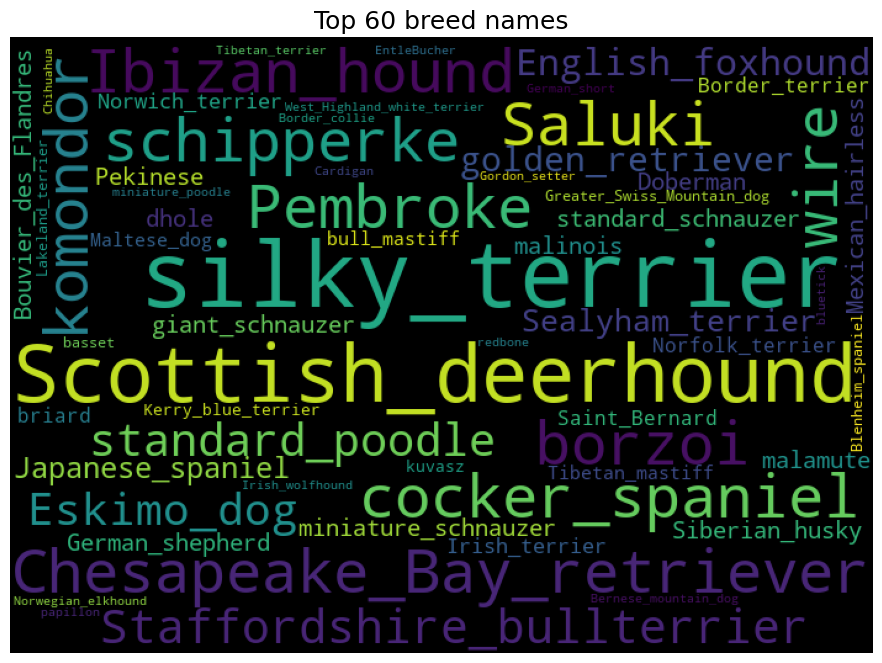

In [7]:
fig = plt.figure(1, figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=700, height=500,
                      background_color="black",max_words=60, relative_scaling=1,
                      normalize_plurals=False).generate(" ".join(df.breed_name))

ax.imshow(wordcloud)
ax.axis("off")
plt.title("Top 60 breed names", fontsize=18)
plt.show()

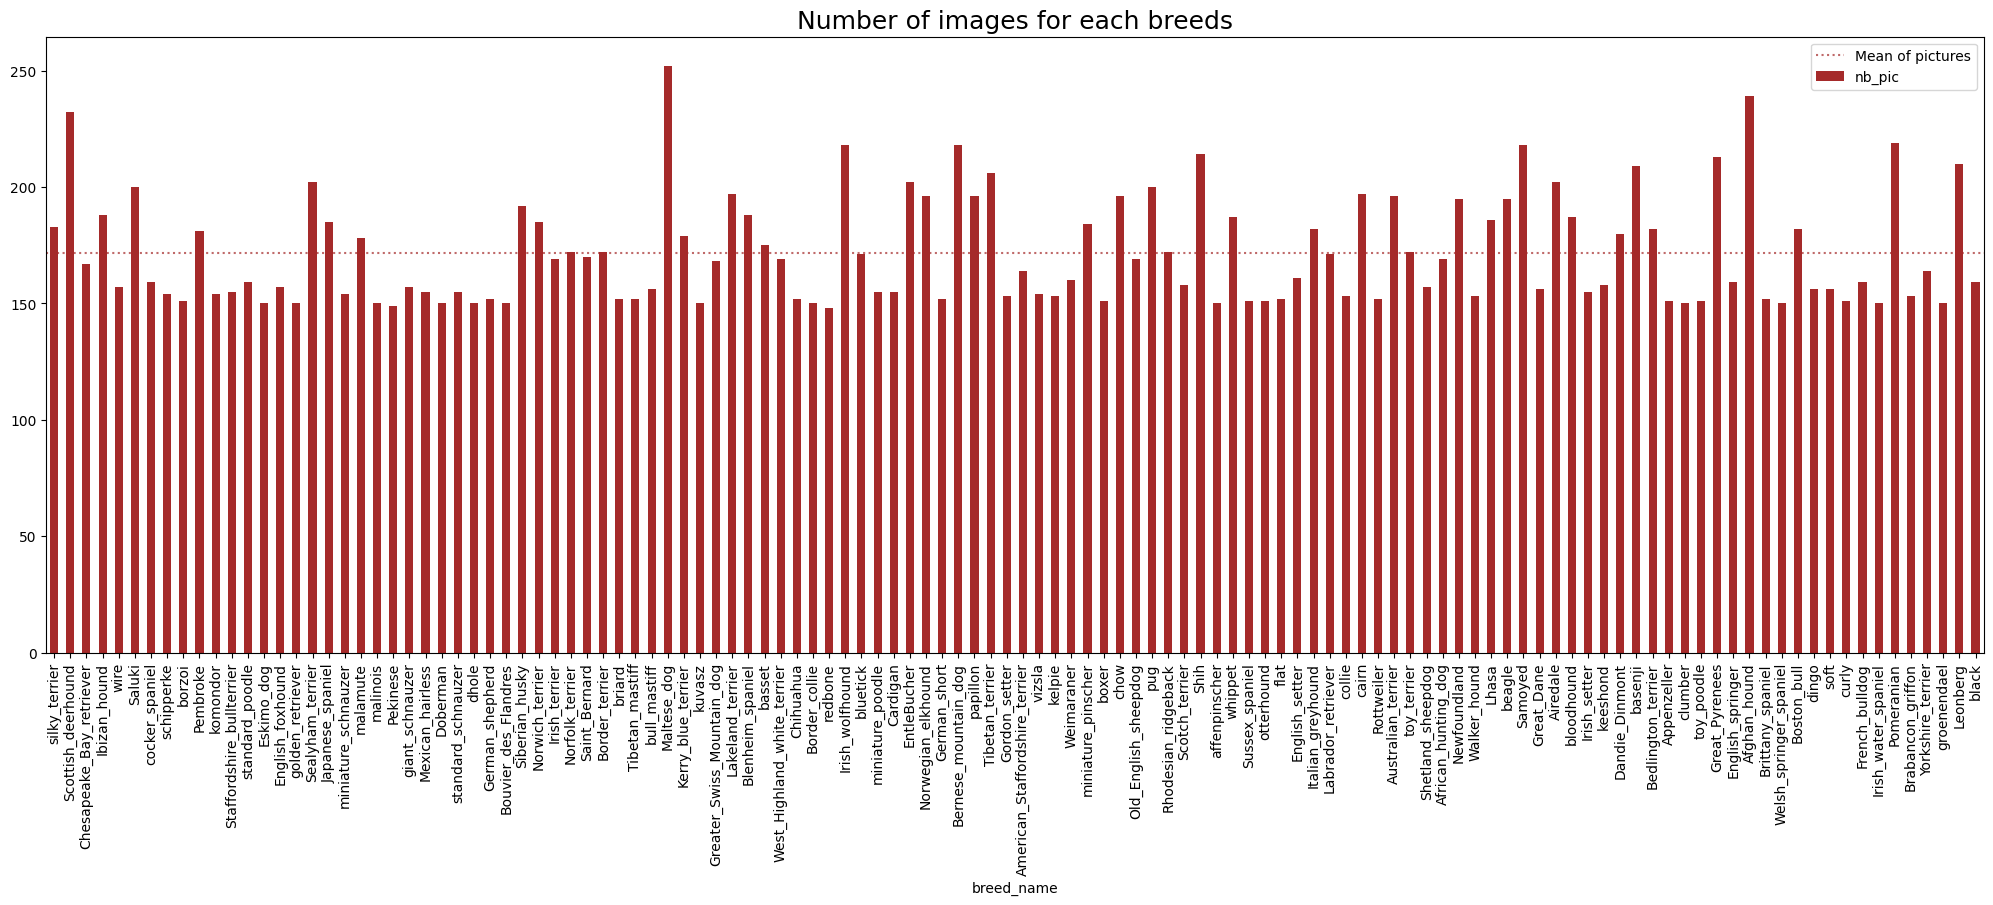

Le nb moyen d'images par classe est de 171.5
Le nb d'images par classe varie entre 148 et 252


In [8]:
fig, ax = plt.subplots(1, 1, figsize=(25,8))
df.plot(x='breed_name',kind="bar", color='brown',legend=False,ax=ax)
ax.axhline(df["nb_pic"].mean(),
           color='brown', alpha=.7,
           linestyle=':',
           label="Mean of pictures")
plt.title("Number of images for each breeds",
          color='k', fontsize=18)
plt.legend()
plt.show()

print("Le nb moyen d'images par classe est de", df["nb_pic"].mean())
print("Le nb d'images par classe varie entre", df["nb_pic"].min(), "et", df["nb_pic"].max())

In [9]:
import matplotlib.image as mpimg

In [10]:
#list of directories 
path_list=[]
for classe in df['Id_name_breed'].values:
    images = os.listdir(f"{PATH_INPUT}//Images" + "/" + classe)
    for i in range(len(images)):
        path_list.append(f"{PATH_INPUT}//Images"+"/"+ classe +"/"+images[i])
        
#list of images shape        
ds_img=[]
for path in path_list:
    ds_img.append(mpimg.imread(path).shape)

#data frame of results    
ds_img = pd.DataFrame(ds_img, index = path_list,columns=['heigth','width','color'])
#list of breed which corespoonds to each path      
y=[]
for j in range(len(list_breeds)):
   for k in range(df.nb_pic.values[j]):
      y.append(df.breed_name.values[j])
ds_img['breed_name']=y

In [11]:
ds_img.sample(10)

heigth  width  color  \
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     479    300      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     333    500      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     240    158      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     375    500      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     375    500      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     500    375      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     211    360      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     500    333      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     375    500      3   
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     333    500      3   

                                                             breed_name  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...              basenji  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...       Dandie_Dinmont  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...          groenendael  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...        Border_collie  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...           Rottweiler  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...     miniature_poodle  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...                black  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...             Leonberg  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...  miniature_schnauzer  
/Users/alexandremonod/Python/OC_ML/projet_6_cla...  miniature_schnauzer

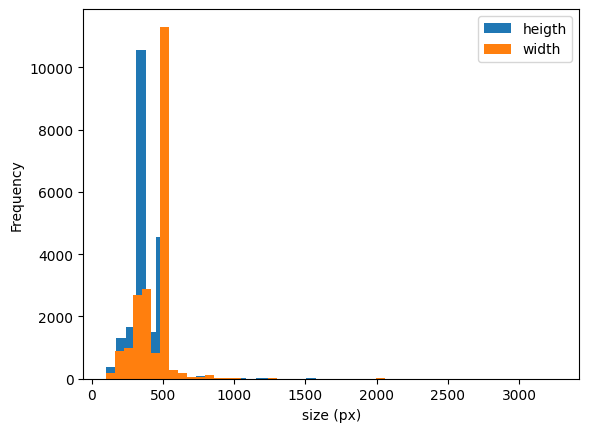

Larguer et hauteur moyennes par image :  (385.86, 442.53)


In [12]:
ds_img['heigth'].plot.hist(bins=35, alpha=1)
ds_img['width'].plot.hist(bins=50, alpha=1)
plt.xlabel('size (px)')
plt.legend(['heigth','width'])
plt.show()
print("Larguer et hauteur moyennes par image : ", (round(ds_img['heigth'].mean(),2),round(ds_img['width'].mean(),2)))

In [13]:
ds_img['color'].value_counts().values[0]

20579

In [14]:
# Obtenir les fréquences des couleurs dans le DataFrame
color_counts = ds_img['color'].value_counts().reset_index()
color_counts.columns = ['Couleur', 'Fréquence']

# Trier les couleurs par ordre décroissant de fréquence
color_counts = color_counts.sort_values(by='Fréquence', ascending=False)

print("Fréquence des couleurs dans le dataset :")
print(color_counts)

Fréquence des couleurs dans le dataset :
   Couleur  Fréquence
0        3      20579
1        4          1


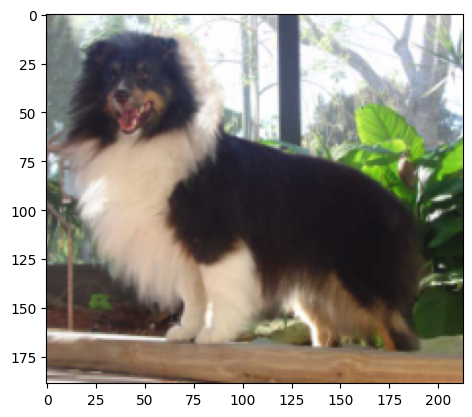

In [15]:
image_color_4 = ds_img[ds_img.color==4].index[0]
img4 = mpimg.imread(image_color_4)
plt.imshow(img4)

L'indice de couleur exprime en fait le niveau de transparence de l'image. Une seule est à 4, on remarque que c'est une image avec une transparence forte dans la partie supérieure droite.

(-0.5, 374.5, 499.5, -0.5)

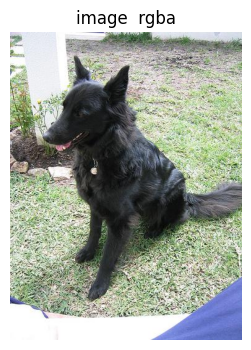

In [16]:
#Affichage d'une image au hasard
plt.fig = plt.figure(figsize=(10,4))
idx = ds_img[ds_img.color==3].index[random.randint(0,len(ds_img[ds_img.color==3]))]
img4 = mpimg.imread(idx)
plt.imshow(img4)
plt.title("image  rgba")
plt.axis('off')

Regardons quelques exemples des images par races disponibles dans notre base d'étude :

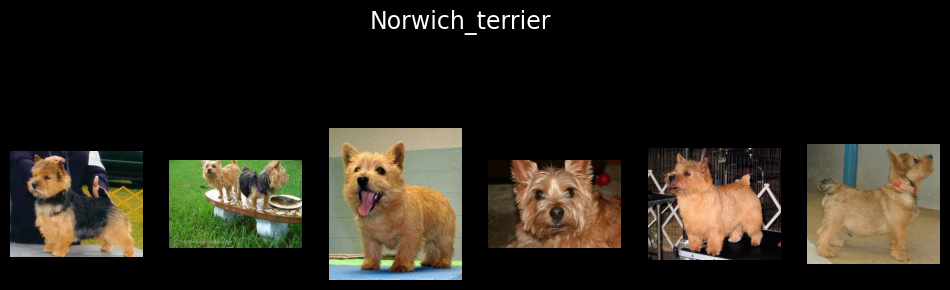

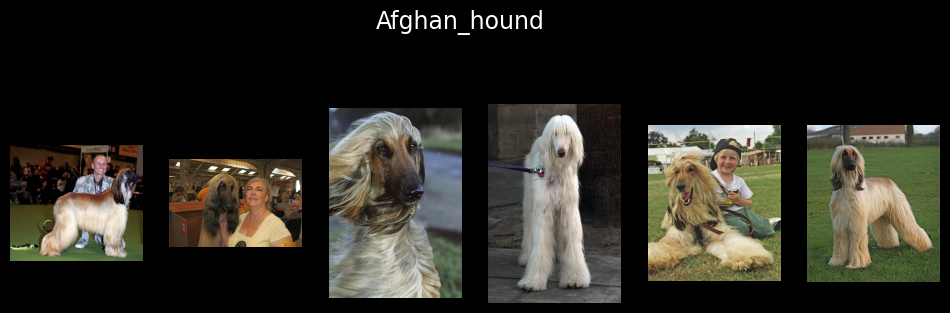

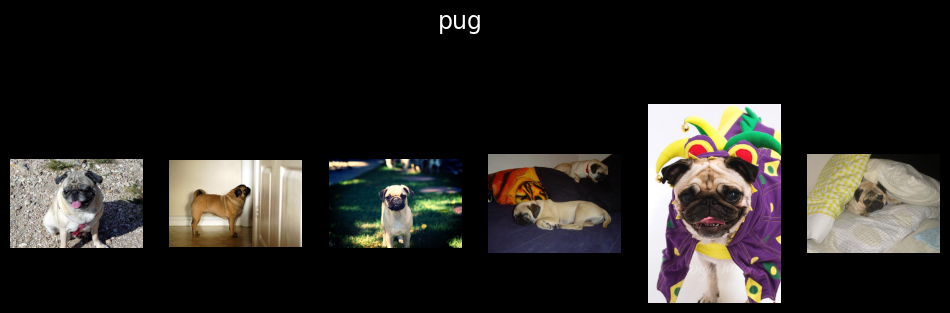

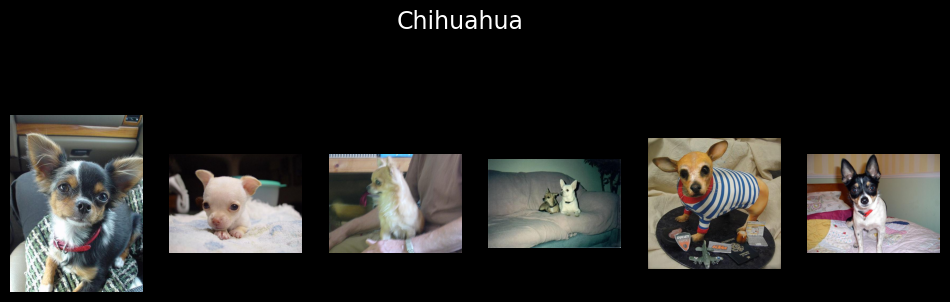

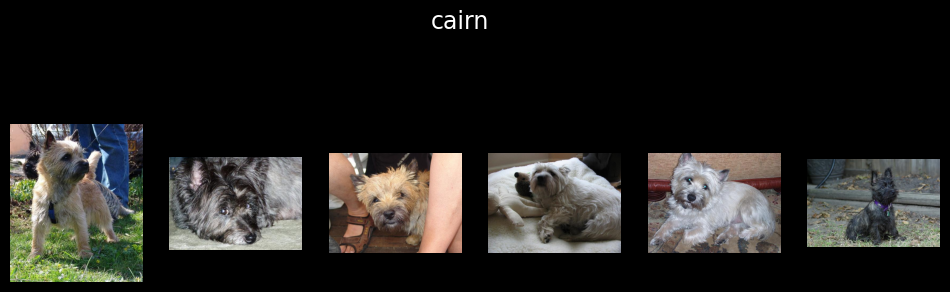

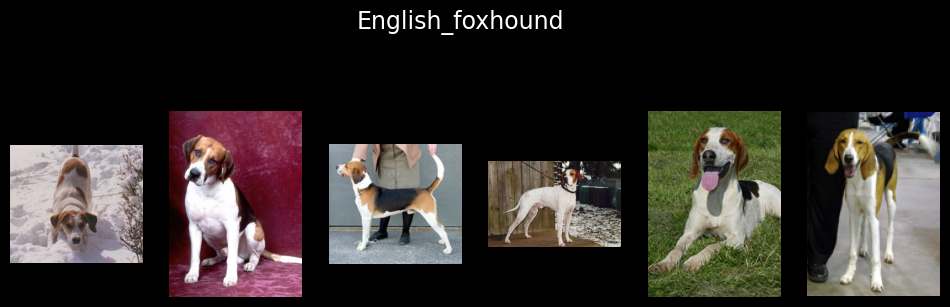

In [17]:
plt.style.use('dark_background')

Num = 6
breed_id_sample = np.random.choice(df['Id_name_breed'].values,Num)
for classe in breed_id_sample:
   images = os.listdir(f"{PATH_INPUT}//Images" + "/" + classe)[:Num]
   fig = plt.figure(figsize=(12,4))
   plt.suptitle("{}".format(classe.split("-")[1]), color="w", fontsize=17) 
   for i in range(Num):
        img = mpimg.imread(f"{PATH_INPUT}//Images"+"/"+ classe +"/"+images[i])
        plt.subplot(1, Num, i+1)
        plt.imshow(img)
        plt.axis('off')  
   plt.show()

La dimension des images n'est pas uniforme ; or le modèle CNN exige une taille unique pour toutes les données. Il faut donc redimensionner les images à une dimension unique. Nous choisissons la dimenstion standard 300*300.

Nous allons ainsi effectuer un ensemble de transformation sur notre base des images. Notamment, la redimensinnement, l'égalisation, le débruitage et le blanchiment.

## 3. Preprocessing

### 1.2.1 Egalisation d'histogramme

Il s'agit de mieux répartir l'intensité lumineuse dans l'ensemble de l'image : les images ternes seront éclairées, les images claires seront assombries.  Cela revient à égaliser un histogramme.  
  
![Histogramme](https://docs.opencv.org/4.x/histogram_equalization.png)  
  
Pour des images couleur, il faut procéder couleur par couleur : red, green, puis blue.

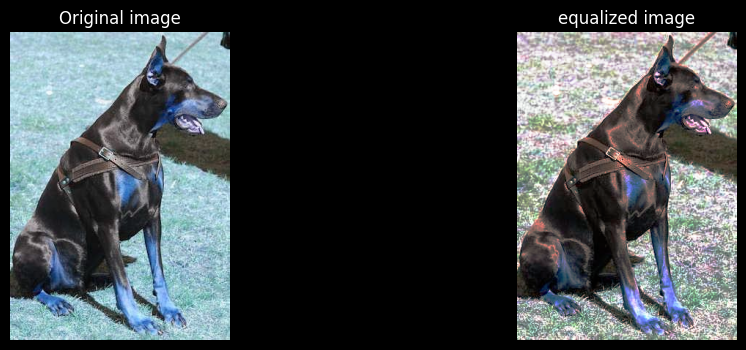

In [18]:
random_path = ds_img.index[np.random.randint(len(ds_img))]
image = cv2.imread(random_path)

# Equalization
r_image, g_image, b_image = cv2.split(image)
r_image_eq = cv2.equalizeHist(r_image)
g_image_eq = cv2.equalizeHist(g_image)
b_image_eq = cv2.equalizeHist(b_image)
image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
cmap_val = None

# Show both images
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.axis('off') 
plt.imshow(image)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.axis('off') 
plt.imshow(image_eq)
plt.title("equalized image")
plt.show()           

### 1.2.2 Débruitage de l'image

Une image peut être "bruitée", c-à-d avoir des pixels indésirables, du grain, en raison de la mauvaise qualité de l'appareil ou de conditions climatiques défavorables.  
Pour débruiter, OpenCV calcule les moyennes de blocs de pixels similaires (blocs avec les mêmes variations de couleur, les mêmes motifs...) et corrgie ensuite chaque bloc individuel. Cela homogénéise, enlève les détails spécifiques de chaque bloc mais limite aussi les "erreurs" du bruit.

Pour la méthode "fastNlMeansDenoisingColored", j'utilise des paramètres par défaut, retrouvés dans différentes explications sur le sujet, notamment sur la documentation [https://docs.opencv.org/4.x/d1/d79/group__photo__denoise.html].

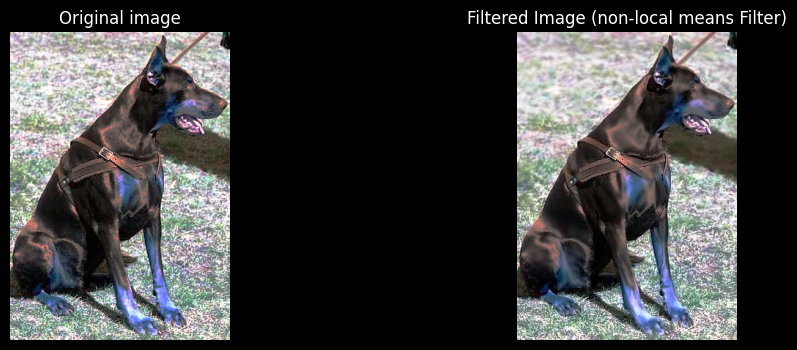

In [19]:
# Apply non-local means filter on test img
img_nlf = cv2.fastNlMeansDenoisingColored(image_eq,None,10,10,21,7)
# Show both img
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.axis('off') 
plt.imshow(image_eq)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.axis('off') 
plt.imshow(img_nlf)
plt.title("Filtered Image (non-local means Filter)")
plt.show()

### 1.2.3 Whitening

Le but du whitening est de supprimer la corrélation entre les pixels.  
Le whitening, contrairement à ce que son nom indique, n'aboutit pas forcément à une image en noir et blanc.

Le processus de whitening peut être résumé comme suit :

Calcul de la matrice de covariance : Tout d'abord, on calcule la matrice de covariance à partir des données d'entrée. La matrice de covariance représente les relations statistiques entre les différentes caractéristiques de l'ensemble de données.

Décomposition en valeurs propres et vecteurs propres : Ensuite, on effectue une décomposition en valeurs propres et vecteurs propres de la matrice de covariance. Cela permet de déterminer les directions principales (vecteurs propres) le long desquelles les données sont les plus étendues et les valeurs propres indiquent les variances associées à ces directions.

Normalisation des vecteurs propres : Les vecteurs propres sont normalisés pour avoir une longueur unitaire, ce qui permet d'obtenir une base orthonormée.

Réduction de la corrélation : Les données d'entrée sont projetées sur cette nouvelle base orthonormée, ce qui les rend décorrélées. Cela signifie que les nouvelles caractéristiques sont statistiquement indépendantes les unes des autres.

Ajustement de l'échelle : Enfin, les caractéristiques sont ajustées en échelle pour avoir une variance unitaire, ce qui est également appelé mise à l'échelle unitaire.

In [20]:
# Test ChatGPT

In [21]:
def whitening(image):
    # Convert the image to floating-point type and normalize to [0, 1]
    image = image.astype(np.float32) / 255.0

    # Calculate the covariance matrix of the image channels
    cov_matrix = np.cov(image.reshape(-1, 3), rowvar=False)

    # Perform the eigendecomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvectors in decreasing order of eigenvalues
    order = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, order]

    # Whitening transformation: Xwhitened = (X - mean) * V * D^(-1/2)
    mean = np.mean(image, axis=(0, 1))
    whitened_image = np.dot(image - mean, eigenvectors) / np.sqrt(eigenvalues + 1e-5)

    # Scale the whitened image to the range [0, 255]
    whitened_image = (whitened_image - np.min(whitened_image)) / (np.max(whitened_image) - np.min(whitened_image))
    whitened_image = (whitened_image * 255).astype(np.uint8)

    return whitened_image

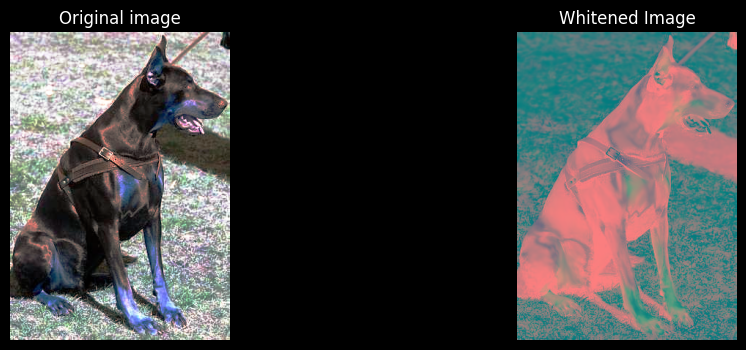

In [22]:
whitened_image = whitening(img_nlf)
# Show both img
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.axis('off') 
plt.imshow(image_eq)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.axis('off') 
plt.imshow(whitened_image,cmap='Greys')
plt.title("Whitened Image")
plt.show()

### 1.2.4 Augmentation de données

L'objectif est de produire de nouvelles images depuis des images existantes afiin d'augmenter la base de données.  
Il s'agit d'appliquer des transformations géométriques aléatoires : translations, rotations, mirroring, ...

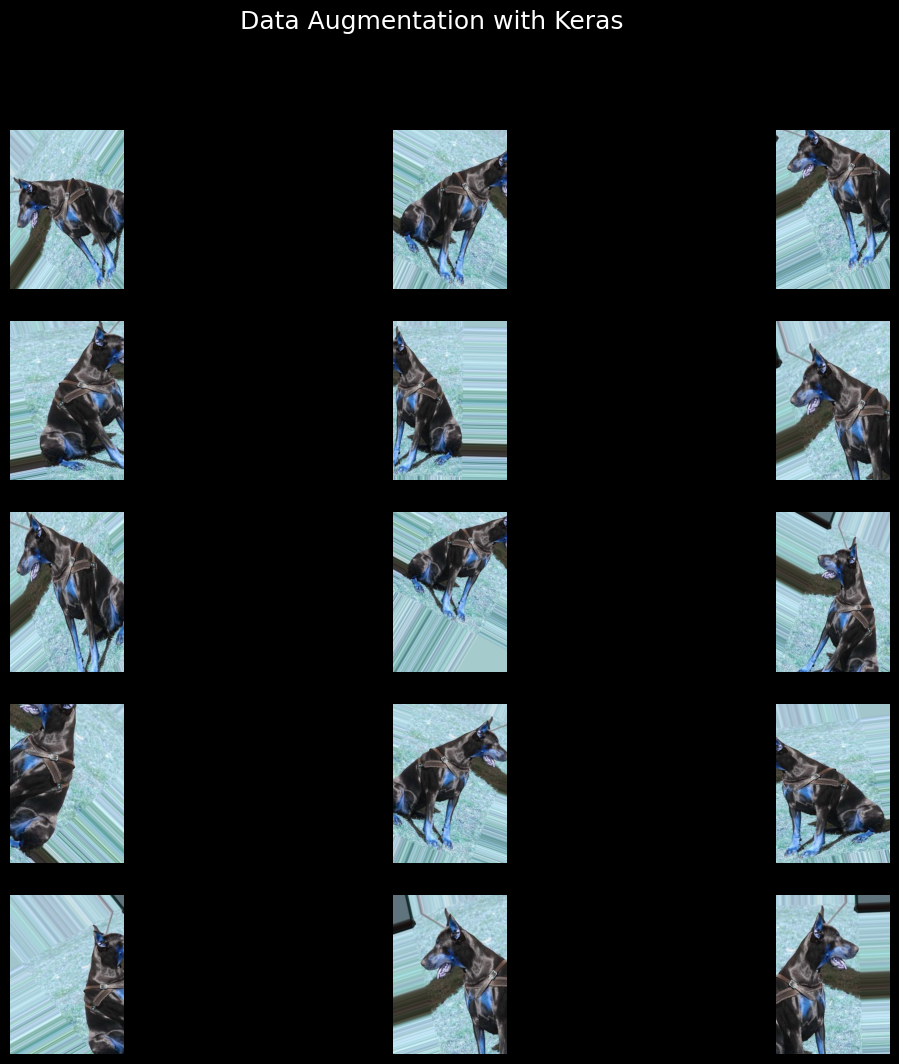

In [23]:
# Création du générateur d'images
datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.25,
        height_shift_range=0.25,
        rescale=1./255,
        shear_range=0.25,
        zoom_range=0.25,
        horizontal_flip=True,
        fill_mode='nearest')

# Convert an image to array
x = image.reshape((1,) + image.shape)

# Generate batches of augmented images from `x`
fig = plt.figure(figsize=(14,12))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):

    # We only want the first 15 batches, so break the loop after that
    if i == 15:
        break

    # Get the subplot for the current batch and display it
    ax = fig.add_subplot(5, 3, i+1)
    ax.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))

    plt.axis('off') 


plt.suptitle("Data Augmentation with Keras", fontsize=18)
plt.show()

## 4. Modèles CNN

Plusieurs paramètres doivent être définis pour entrainer un modèle CNN : 
- __le type de fonction d'activation__ : elle introduit de la non-linéarité dans le modèle et détermine l'output d'un neurone dans le réseau
- __l'algorithme d'optimisation__ : méthode utilisée pour ajuster les poids du réseau afin de minimiser la fonction de coût
- __le nb de filtres__ (sur la couche de convolution)/nb de kernel : chaque filtre est capable de détecter une caractéristique spécifique dans l'image (par exemple, les bords, les couleurs, etc.). Un nombre plus élevé de filtres permet au réseau d'apprendre une plus grande variété de caractéristiques, mais augmente également la complexité du modèle.
- __le Wind__ : taille de la fenêtre d'entrée sur laquelle le filtre de convolution est appliqué. Par exemple, une taille de fenêtre de 3 signifie que le filtre est appliqué sur des carrés de 3x3 pixels à la fois. La taille de la fenêtre influence le niveau de détail que le réseau peut apprendre : une taille de fenêtre plus petite permet de capturer des détails fins, tandis qu'une taille plus grande permet de capturer des caractéristiques plus globales.
- __le nb d'Epochs__ : nb de fois l'ensemble du jeu de données est passé au travers du réseau neuronal

Il va falloir déterminer quels sont les paramètres les plus performants dans notre cas.

Les mesures classiques d'évaluation d'un modèle CNN sont :
- __Accuracy__ : indique la performance du modèle à travers la proportion d'observations correctement classées par rapport à toutes les observations
- __Loss__ : mesure la manière dont le modèle s'ajuste aux données. Une perte élevée indique un surajustement, une perte faible est bon signe.

### Train-test sur 5 races

In [53]:
NB_BREEDS = 5

In [25]:
def preprocessing(uri_list,input_shape):
    """Preprocessing of images for convolutional neural network.
    Equalization, Denoising and transformation of the image into Array. 
    ------------------
    param:
    uri_list: 
    list of images directories
    input_shape: 
    (width, heigth) size of the image  for target resizing
    """
    img_list=[]
    for uri in uri_list:
            # Read image
            image = cv2.imread(uri)
            # Resize image
            image = cv2.resize(image, input_shape)
            # Equalization
            r_image, g_image, b_image = cv2.split(image)
            r_image_eq = cv2.equalizeHist(r_image)
            g_image_eq = cv2.equalizeHist(g_image)
            b_image_eq = cv2.equalizeHist(b_image)
            image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
            # Apply non-local means filter 
            img_nlf = cv2.fastNlMeansDenoisingColored(image_eq,None,10,10,7,21)
            img_nlf = whitening(img_nlf)
            # Append lists of labels and image
            img_list.append(img_nlf)
            #labels = ds_img.bread_name[0:tot_nb_img]
        
  
    return np.array(img_list)

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [27]:
uri_list=ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]
X = preprocessing(uri_list, (300,300))
y = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y = np.array(y)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [28]:
from tensorflow.keras.utils import to_categorical

In [30]:
#Séparation jeux entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded = to_categorical(y_train, num_classes=NB_BREEDS)
y_test_encoded = to_categorical(y_test, num_classes=NB_BREEDS)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Callbacks

In [60]:
import keras

In [61]:
checkpoint_cb  = keras.callbacks.ModelCheckpoint("Best_Model_1.h5",monitor='loss',
                                                 verbose=1,save_best_only=True,mode='min')

In [62]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.001,
                                                  patience=10,verbose=1,mode='auto')

In [63]:
callbacks = [checkpoint_cb,early_stopping_cb]

In [57]:
def create_model(NB_BREEDS):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    #model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(300, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(NB_BREEDS, activation='softmax')) # For multi-class classification
    
    
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Source pour ce modèle : 

In [ ]:
def create_model_bis(NB_BREEDS):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(300, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(NB_BREEDS, activation='softmax')) # For multi-class classification
                    # Couche Dropout : permet de prévenir le surapprentissage
    
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Pb de surapprentissage : corrections de Daouda : 
- Commentaire de lignes Convolutionnel et Pooling.
- Changement d'optimizer de adam vers sgd

MAIS du coup l'accuracy ne change plus, sur > 10 epochs.

In [64]:
model = create_model(NB_BREEDS)
history = model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_test, y_test_encoded), batch_size=32, callbacks=callbacks)

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 338571.0000 - accuracy: 0.2105
Epoch 1: loss improved from inf to 338571.00000, saving model to Best_Model_1.h5


/Users/alexandremonod/Python/OC_ML/projet_6_classer_des_images/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 26s 1s/step - loss: 338571.0000 - accuracy: 0.2105 - val_loss: 1.6490 - val_accuracy: 0.2151
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 1.6289 - accuracy: 0.2065
Epoch 2: loss improved from 338571.00000 to 1.62887, saving model to Best_Model_1.h5
24/24 [==============================] - 29s 1s/step - loss: 1.6289 - accuracy: 0.2065 - val_loss: 1.6208 - val_accuracy: 0.2151
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 1.6197 - accuracy: 0.2011
Epoch 3: loss improved from 1.62887 to 1.61973, saving model to Best_Model_1.h5
24/24 [==============================] - 30s 1s/step - loss: 1.6197 - accuracy: 0.2011 - val_loss: 1.6044 - val_accuracy: 0.3065
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 1.6215 - accuracy: 0.2159
Epoch 4: loss did not improve from 1.61973
24/24 [==============================] - 28s 1s/step - loss: 1.6215 - accuracy: 0.2159 - val_loss: 1.6159 - val_acc

Il faut bcp de temps pour optimiser ces modèles, à la main, en améliorant la suite des couches. C'est pour cela aussi qu'on peut se tourner vers le Transfer Learning, qui va bien plus loin.

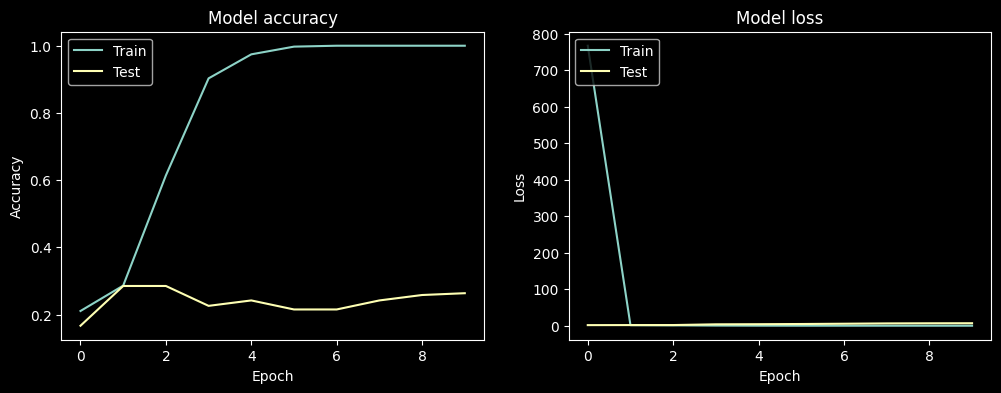

In [34]:
def plot_results(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

plot_results(history)

### Train-test sur 15 races

In [35]:
NB_BREEDS = 15

In [36]:
uri_list_2 =ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]
X_2 = preprocessing(uri_list_2, (300,300))
y_2 = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y_2 = np.array(y_2)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder_2 = LabelEncoder()
encoder_2.fit(y_2)
y_2 = encoder_2.transform(y_2)

In [37]:
#Séparation jeux entraînement/test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded_2 = to_categorical(y_train_2, num_classes=NB_BREEDS)
y_test_encoded_2 = to_categorical(y_test_2, num_classes=NB_BREEDS)

In [38]:
model_2 = create_model(NB_BREEDS)
history_2 = model_2.fit(X_train_2, y_train_encoded_2, epochs=10, validation_data=(X_test_2, y_test_encoded_2))

Epoch 1/10
64/64 [==============================] - 46s 710ms/step - loss: 240.6493 - accuracy: 0.0746 - val_loss: 2.7080 - val_accuracy: 0.0647
Epoch 2/10
64/64 [==============================] - 49s 755ms/step - loss: 2.7071 - accuracy: 0.0771 - val_loss: 2.7076 - val_accuracy: 0.0725
Epoch 3/10
64/64 [==============================] - 46s 724ms/step - loss: 2.7060 - accuracy: 0.0800 - val_loss: 2.7071 - val_accuracy: 0.0725
Epoch 4/10
64/64 [==============================] - 53s 831ms/step - loss: 2.7049 - accuracy: 0.0805 - val_loss: 2.7067 - val_accuracy: 0.0922
Epoch 5/10
64/64 [==============================] - 50s 787ms/step - loss: 2.7029 - accuracy: 0.1016 - val_loss: 2.7103 - val_accuracy: 0.0902
Epoch 6/10
64/64 [==============================] - 56s 872ms/step - loss: 2.7244 - accuracy: 0.0982 - val_loss: 2.7062 - val_accuracy: 0.0902
Epoch 7/10
64/64 [==============================] - 48s 748ms/step - loss: 2.7016 - accuracy: 0.0923 - val_loss: 2.7063 - val_accuracy: 0.09

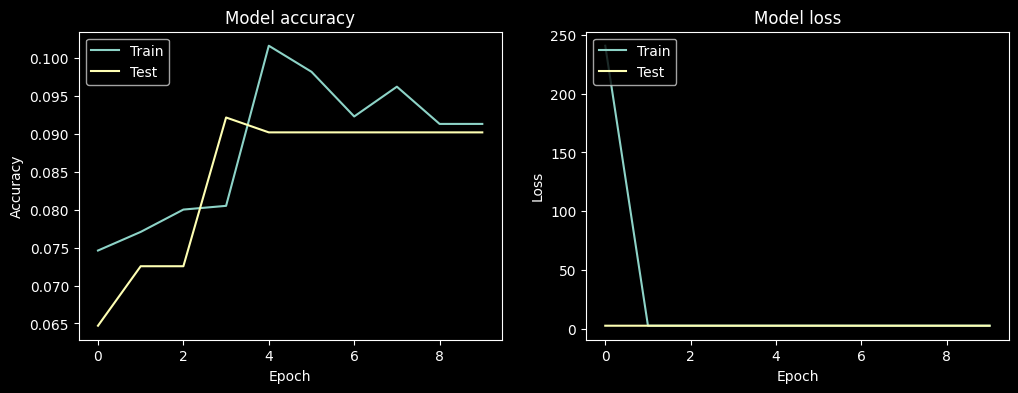

In [39]:
plot_results(history_2)

### Data Augmentation sur 5 races

In [ ]:
NB_BREEDS = 5

In [40]:
uri_list_15_3 = ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]
X_3 = preprocessing(uri_list_15_3, (300,300))
y_3 = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y_3 = np.array(y_3)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder_3 = LabelEncoder()
encoder_3.fit(y_3)
y_3 = encoder_3.transform(y_3)

In [41]:
#Séparation jeux entraînement/test
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded_3 = to_categorical(y_train_3, num_classes=NB_BREEDS)
y_test_encoded_3 = to_categorical(y_test_3, num_classes=NB_BREEDS)

Observer cb d'images sont créées ; comment le Data Augmentation se passe (transformationd es images existantes et/ou création de nouvelles)

Transfer Leanrning : 
VGG16
Inception
SI temps : Resnet

In [43]:
model_3 = create_model(NB_BREEDS)

In [44]:
train_gen2 = datagen.flow(X_train_3, y_train_encoded_3, batch_size=32)

In [65]:
history_3 = model_3.fit(train_gen2, epochs=10, validation_data=(X_test_3, y_test_encoded_3))

Epoch 1/10
64/64 [==============================] - 75s 1s/step - loss: 2.6998 - accuracy: 0.0913 - val_loss: 2.7054 - val_accuracy: 0.0902
Epoch 2/10
64/64 [==============================] - 64s 999ms/step - loss: 2.6997 - accuracy: 0.0913 - val_loss: 2.7055 - val_accuracy: 0.0902
Epoch 3/10
64/64 [==============================] - 57s 887ms/step - loss: 2.6995 - accuracy: 0.0913 - val_loss: 2.7059 - val_accuracy: 0.0902
Epoch 4/10
64/64 [==============================] - 55s 854ms/step - loss: 2.6994 - accuracy: 0.0913 - val_loss: 2.7059 - val_accuracy: 0.0902
Epoch 5/10
64/64 [==============================] - 61s 957ms/step - loss: 2.6994 - accuracy: 0.0913 - val_loss: 2.7061 - val_accuracy: 0.0902
Epoch 6/10
64/64 [==============================] - 63s 979ms/step - loss: 2.6993 - accuracy: 0.0913 - val_loss: 2.7063 - val_accuracy: 0.0902
Epoch 7/10
64/64 [==============================] - 67s 1s/step - loss: 2.6993 - accuracy: 0.0913 - val_loss: 2.7063 - val_accuracy: 0.0902
Epoch

Impossible de savoir cb de fois le modèle va voir les images originales et cb de fois il va voir les images data augmentées.

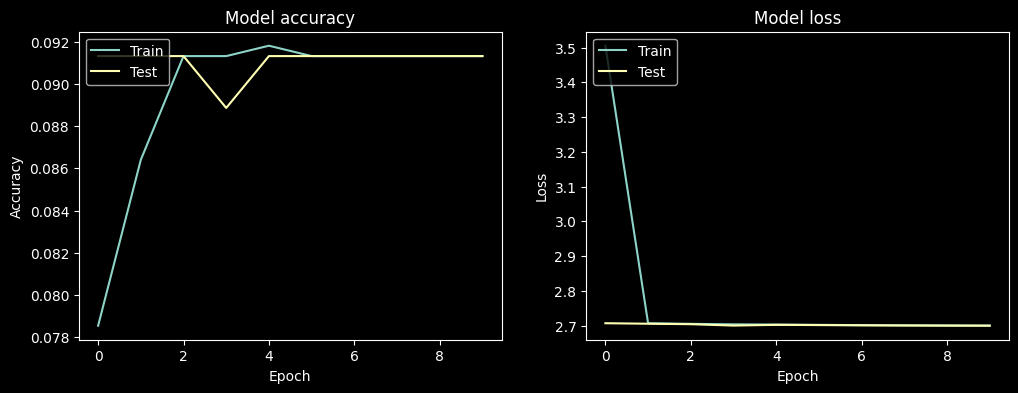

In [46]:
plot_results(history_3)

La Data Augmentation a-t-elle apporté une meilleure accuracy et un meilleur loss ?

In [ ]:
# End code

## 5. Transfer Learning

In [47]:
Nb_BREEDS = 15
uri_list_vgg16 =ds_img.index.values[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

X_vgg16 = preprocessing(uri_list_vgg16, (300,300))
y_vgg16 = ds_img.breed_name[0:np.sum(df.nb_pic.values[0:NB_BREEDS])]

# Convert data in numpy array
y_vgg16 = np.array(y_vgg16)

# Dans un modèle CNN, les labels doivent être numériques. Il faut les encoder.
encoder_vgg16 = LabelEncoder()
encoder_vgg16.fit(y_vgg16)
y_vgg16 = encoder_vgg16.transform(y_vgg16)

#Séparation jeux entraînement/test
X_train_vgg16, X_test_vgg16, y_train_vgg16, y_test_vgg16 = train_test_split(X_vgg16, y_vgg16, test_size=0.2,shuffle=True, random_state=42)

# Passage des X et y de int en categ
y_train_encoded_vgg16 = to_categorical(y_train_vgg16, num_classes=NB_BREEDS)
y_test_encoded_vgg16 = to_categorical(y_test_vgg16, num_classes=NB_BREEDS)

In [48]:
from keras.applications.vgg16 import preprocess_input

train_datagen_vgg16 = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function= preprocess_input)

test_datagen_vgg16 = ImageDataGenerator(preprocessing_function=preprocess_input)

In [49]:
train_gen_vgg16 = train_datagen_vgg16.flow(X_train_vgg16, y_train_encoded_vgg16, batch_size=32, subset="training")
validation_vgg16 = train_datagen_vgg16.flow(X_train_vgg16, y_train_encoded_vgg16, batch_size=32, subset='validation')

In [50]:
from keras.applications.vgg16 import VGG16
# load model and specify a new input shape for images
model_vgg16 = VGG16(include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 17s 0us/step


In [51]:
# Fit and results
result_vgg16 = model_vgg16.fit(train_gen_vgg16,
          validation_data=validation_vgg16,
          steps_per_epoch=len(X_train) / 32, epochs=30, verbose=2);

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [66]:
# Obsolète, à supprimer

__Pour faire tout cela, je crée une fonction avec les couches du modèle, et je lui passe les paramètres avec un RandomizedSearch.__

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Fonction pour créer le modèle, nécessaire pour KerasClassifier
def create_model(optimizer='adam', activation='relu', nb_filters=32, kernel_size=3):
    model = Sequential()
    model.add(Conv2D(nb_filters, kernel_size=(kernel_size, kernel_size), activation=activation, input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(len(list_breeds), activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Créer le modèle avec KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Définir les paramètres de la grille de recherche
optimizer = ['SGD', 'Adam']
activation = ['relu', 'tanh', 'sigmoid']
nb_filters = [32, 64, 128]
kernel_size = [3, 5]
epochs = [10, 20, 30]

param_grid = dict(optimizer=optimizer, activation=activation, nb_filters=nb_filters, kernel_size=kernel_size, epochs=epochs)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, scoring=['accuracy', 'neg_log_loss'], refit='accuracy')

In [ ]:
# ECHEC DU RANDOMIZEDSEARCH

# Fonction pour créer le modèle, nécessaire pour KerasClassifier
def create_model_func(nb_filters, kernel_size):
    def create_model(optimizer='adam', activation='relu'):
        model = Sequential()
        model.add(Conv2D(nb_filters, kernel_size=(kernel_size, kernel_size), activation=activation, input_shape=(64, 64, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation=activation))
        model.add(Dense(len(list_breeds), activation='softmax'))
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return model
    return create_model


# Créer le modèle avec KerasClassifier
model = KerasClassifier(build_fn=create_model_func(32,3), verbose=0)

# Définir les paramètres de la grille de recherche
optimizer = ['SGD', 'Adam']
activation = ['relu', 'tanh', 'sigmoid']
nb_filters = [32, 64, 128]
kernel_size = [3, 5]
epochs = [10, 20, 30]

param_grid = dict(optimizer=optimizer, activation=activation, nb_filters=nb_filters, kernel_size=kernel_size, epochs=epochs)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, scoring=['accuracy', 'neg_log_loss'], refit='accuracy')

# Exécuter la recherche sur grille
grid_result = grid.fit(X_train, y_train)

# Résumer les résultats
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ValueError: Invalid parameter nb_filters for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(nb_filters=64)`
Check the list of available parameters with `estimator.get_params().keys()`